# **Project Name**    - Paisabazaar banking Fraud Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Project By - Rishav Sinha**


# **Project Summary -**

The financial industry has witnessed a significant rise in fraudulent activities and credit risks over the past decade, making fraud detection and credit risk assessment critical areas of focus for banks and financial institutions. In this project, we analyze a large-scale dataset provided by Paisabazaar, which includes customer demographics, financial details, credit utilization patterns, and payment behaviors. By conducting Exploratory Data Analysis (EDA) and visualizations, the goal is to uncover key insights that can help detect fraudulent behavior, assess financial risk, and strengthen customer credit profiling.

The dataset consists of 81782 records with 28 attributes related to customer identity, financial history, and credit score. Key columns include Annual Income, Monthly Inhand Salary, Number of Bank Accounts, Number of Credit Cards, Interest Rate, Outstanding Debt, Credit Utilization Ratio, Credit History Age, Payment Behavior, and Credit Score. These variables are essential indicators of financial health and are widely used in risk modeling and fraud detection systems. The presence of demographic details such as Age, Occupation, and SSN adds an additional layer for identifying potential fraud cases, such as multiple accounts linked to the same identity or unrealistic financial behaviors.

The first step of the project involves data cleaning and preprocessing. Although the dataset does not contain missing values, duplicate entries or repeated customer records across multiple months are also examined to ensure data integrity.

The next stage focuses on Exploratory Data Analysis (EDA). Here, we investigate how different features relate to fraudulent or risky financial behavior. For instance, the relationship between Credit Utilization Ratio and Credit Score can reveal whether customers who use higher proportions of their available credit are more likely to have poor scores. Similarly, analysis of Number of Delayed Payments and Delay from Due Date can highlight patterns of financial irresponsibility, which are often precursors to fraud or default. Visualizations such as histograms, boxplots, heatmaps, and correlation matrices help identify trends, anomalies, and feature interdependencies.

One of the core aspects of this project is fraud analysis. Fraudulent behavior often manifests in unrealistic or contradictory patterns in financial data. For example, a customer with a low annual income but multiple credit cards, high loan counts, and excessive monthly spending could indicate suspicious activity. Similarly, sudden changes in Credit Limit, unusually high Credit Inquiries, or inconsistent Payment Behavior can serve as red flags. By combining statistical analysis and visual exploration, we aim to highlight such irregularities.

Another key outcome of this project is credit risk profiling. The dataset contains a labeled feature, Credit Score, categorized as Good, Standard, or Poor. By analyzing the distribution of features across these groups, we can uncover the primary factors contributing to poor credit performance. For example, high EMI obligations compared to income, frequent delays in payment, and poor credit mix are expected to correlate strongly with lower credit scores. These insights are valuable for banks in developing scoring models and improving lending decisions.

Visual storytelling plays a vital role in this analysis. Through bar charts, scatter plots, and trend graphs, we illustrate how financial indicators differ across customer segments. Heatmaps and pair plots help identify multi-feature interactions, while boxplots highlight outliers that may correspond to fraud. For instance, we can visualize the variation of Outstanding Debt across different income groups or compare Payment Behavior with Credit Utilization Ratios to detect unusual spending habits.

In conclusion, this project provides a comprehensive understanding of customer financial behavior using real-world banking data. By leveraging EDA and visualization techniques, we identify patterns of fraud, risk factors affecting credit scores, and relationships between financial attributes. The insights gained not only aid in detecting fraudulent activities but also enable financial institutions to optimize their credit risk strategies and enhance customer profiling systems. Ultimately, this project demonstrates how data-driven analysis can contribute to safer, more transparent, and more efficient banking systems.

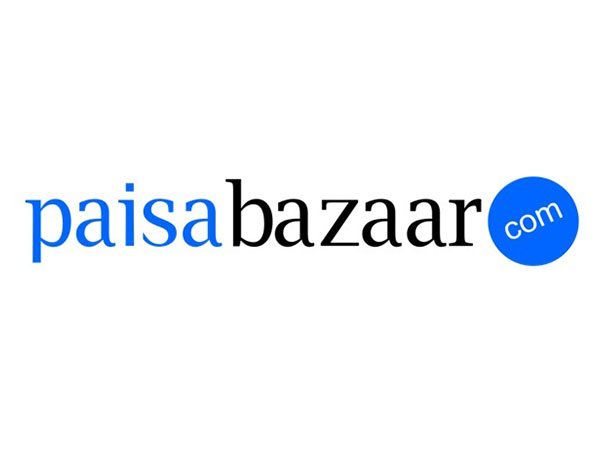

# **GitHub Link -**

https://github.com/rishav7575/Paisabazaar-Banking-Fraud-Analysis

# **Problem Statement**


**We are given a dataset of 81782 banking customers with detailed information about their financial activities, credit history, and personal profiles, how can we effectively analyze this data to detect and flag potential fraudulent behavior? The analysis should focus on identifying patterns and anomalies that deviate from typical customer behavior, which could indicate fraudulent activities such as credit card fraud, loan exploitation, or unusual financial transactions. We have to use atleast 5 different types of charts in the visualization section.**

#### **Define Your Business Objective?**

The objective of this project is to analyze customer financial and behavioral data to detect potential banking fraud and assess credit risk more effectively. By leveraging Exploratory Data Analysis and visualization techniques, our project aims to uncover hidden patterns, anomalies, and key factors that indicate fraudulent activity or poor credit performance. These insights will help financial institutions like Paisabazaar strengthen fraud detection systems, optimize lending decisions, and improve overall customer risk profiling.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset
paisabazaar_df = pd.read_csv('/content/dataset.csv')

### Dataset First View

In [ ]:
# Dataset First Look
paisabazaar_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
paisabazaar_df.shape


### Dataset Information

In [ ]:
# Dataset Info
paisabazaar_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(paisabazaar_df[paisabazaar_df.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
paisabazaar_df.isnull().sum()

In [ ]:
# Visualizing the missing values
sns.heatmap(paisabazaar_df.isnull(), cbar='coolwarm')


### What did you know about your dataset?

During the initial exploration of the dataset, I found that there are 100000 rows and 28 columns in the dataset. Also the  Age column is stored as a float type, so we have to convert it into an integer type for better accuracy and interpretation. I also checked for duplicate records, but no duplicates were found in the dataset. While analyzing missing values, I observed that the last 3 columns namely (Payment_Behaviour, Monthly_Balance, Credit_Score) contained one null value each.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
paisabazaar_df.columns

In [ ]:
# Dataset Describe
paisabazaar_df.describe(include='all')

### Variables Description

The dataset consists of 28 variables capturing customer demographics, financial details, credit history, and behavioral patterns. Key features include Age, Occupation, Annual Income, Number of Bank Accounts, Credit Utilization Ratio, Outstanding Debt, and Payment Behavior, which help in understanding customer financial profiles. The target variable is Credit Score, categorized as Good, Standard, or Poor, which serves as a benchmark for assessing fraud risk and creditworthiness.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
paisabazaar_df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Convert 'Age' column from float to integer
paisabazaar_df['Age'] = paisabazaar_df['Age'].astype(int)

# Check for duplicate values
duplicates = paisabazaar_df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Check for null values
print("Null values before cleaning: As we found earlier in the project there were 1 null value in last 9 columns each")

# Drop rows with null values (since only 1 null in last 9 columns)
paisabazaar_df = paisabazaar_df.dropna()


# Verify after cleaning
print("Shape after dropping null values:", paisabazaar_df.shape)
print("Null values after cleaning:\n", paisabazaar_df.isnull().sum())


In [ ]:
#Removing outliers in 'Annual_Income' column using IQR
Q1 = paisabazaar_df['Annual_Income'].quantile(0.25)
Q3 = paisabazaar_df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1
df = paisabazaar_df[(paisabazaar_df['Annual_Income'] >= (Q1 - 1.5 * IQR)) & (paisabazaar_df['Annual_Income'] <= (Q3 + 1.5 * IQR))]

In [ ]:
#Creating a new column 'Income_per_Account'
paisabazaar_df['Income_per_Account'] = paisabazaar_df['Annual_Income'] / paisabazaar_df['Num_Bank_Accounts']

In [ ]:
#Creating a feature 'Credit_Score_Level'
paisabazaar_df['Credit_Score_Level'] = paisabazaar_df['Credit_Score'].apply(lambda x: 'High' if isinstance(x, int) and x > 700 else 'Low')

### What all manipulations have you done and insights you found?

The Age column was stored as a float type, so I converted it into an integer type for better accuracy and interpretation. I also checked for duplicate records, but no duplicates were found in the dataset. While analyzing missing values, I observed that the last nine columns namely (Payment_Behaviour, Monthly_Balance, Credit_Score) contained one null value each. To ensure data consistency and avoid biased analysis, I decided to drop all rows containing null values. After these preprocessing steps, the dataset is now cleaner, with standardized datatypes and no missing or duplicate records, making it ready for further analysis and visualization.
Also, we have remomed outliers from our "Annual_Income" column to remove extremely high or low incomes compared to the majority.
We have also created two new columns:-
1- Income_per_Account - To represent income per account of an individual if they are having multiple accounts.
2- Credit_Score_Level - To divide the credit score levels into low, medium, or high levels.

## 4. ***KPIs(Key Perfromance Indicators) Calculation***

#### 1 - Customer Demographics

In [ ]:
#Average Age of Customers
avg_age = paisabazaar_df['Age'].mean()
print(f"Average Age of Customers: {avg_age:.2f} years")



In [ ]:
#Distribution of Occupation
occupation_counts = paisabazaar_df['Occupation'].value_counts()
print("Distribution of Occupation:")
print(occupation_counts)

In [ ]:
#Number of Customers by Income Group

# Define income groups (bins)
max_income = paisabazaar_df['Annual_Income'].max()
bins = [0, 25000, 50000, 100000, 200000]

labels = ['Low (<25K)', 'Lower-Middle (25K-50K)',
          'Middle (50K-100K)', 'Upper-Middle (100K-200K)']

if max_income > 200000:
    bins.append(max_income)
    labels.append('High (>200K)')

# Create income group column
paisabazaar_df['Income_Group'] = pd.cut(paisabazaar_df['Annual_Income'], bins=bins, labels=labels, include_lowest=True)

# KPI: Number of customers by income group
income_group_counts = paisabazaar_df['Income_Group'].value_counts().sort_index()

print(income_group_counts)

#### 2- Financial Behavior

In [ ]:
#Average Annual Income
avg_annual_income = paisabazaar_df['Annual_Income'].mean()
print(f"Average Annual Income: ${avg_annual_income:.2f}")

In [ ]:
#Average Monthly In-hand Salary
avg_monthly_salary = paisabazaar_df['Monthly_Inhand_Salary'].mean()
print(f"Average Monthly In-hand Salary: ${avg_monthly_salary:.2f}")

In [ ]:
#Average Debt-to-Income Ratio
debt_to_income_ratio = paisabazaar_df['Outstanding_Debt'] / paisabazaar_df['Annual_Income']
avg_debt_to_income_ratio = debt_to_income_ratio.mean()
print(f"Average Debt-to-Income Ratio: {avg_debt_to_income_ratio:.2f}")


In [ ]:
#Average Credit Utilization Ratio
credit_utilization_ratio = paisabazaar_df['Credit_Utilization_Ratio']
avg_credit_utilization_ratio = credit_utilization_ratio.mean()
print(f"Average Credit Utilization Ratio: {avg_credit_utilization_ratio:.2f}")

In [ ]:
#Average Number of Bank Accounts
avg_num_bank_accounts = paisabazaar_df['Num_Bank_Accounts'].mean()
print(f"Average Number of Bank Accounts: {avg_num_bank_accounts:.2f}")

In [ ]:
#Average Number of Credit Cards
avg_num_credit_cards = paisabazaar_df['Num_Credit_Card'].mean()
print(f"Average Number of Credit Cards: {avg_num_credit_cards:.2f}")

#### 3- Loan & Credit Performance

In [ ]:
#Average Number of Loans per Customer
avg_num_loans = paisabazaar_df['Num_of_Loan'].mean()
print(f"Average Number of Loans per Customer: {avg_num_loans:.2f}")

In [ ]:
#Average Interest Rate
avg_interest_rate = paisabazaar_df['Interest_Rate'].mean()
print(f"Average Interest Rate: {avg_interest_rate:.2f}%")

In [ ]:
#Total EMI as percentage of Income (EMI Burden Ratio)
total_emi = paisabazaar_df['Total_EMI_per_month'].sum()
total_income = paisabazaar_df['Annual_Income'].sum()
emi_burden_ratio = (total_emi / total_income) * 100
print(f"Total EMI as % of Income (EMI Burden Ratio): {emi_burden_ratio:.2f}")

In [ ]:
#Average Credit History Age
avg_credit_history_age = paisabazaar_df['Credit_History_Age'].mean()
print(f"Average Credit History Age: {avg_credit_history_age:.2f} years")

#### 4-Risk And Fraud Indicators

In [ ]:
#Average Number of Delayed Payments
avg_num_delayed_payments = paisabazaar_df['Num_of_Delayed_Payment'].mean()
print(f"Average Number of Delayed Payments: {avg_num_delayed_payments:.2f}")

In [ ]:
#Delay from Due Date(avg, min, max)
avg_delay_from_due_date = paisabazaar_df['Num_of_Delayed_Payment'].mean()
min_delay_from_due_date = paisabazaar_df['Num_of_Delayed_Payment'].min()
max_delay_from_due_date = paisabazaar_df['Num_of_Delayed_Payment'].max()
print(f"Average Delay from Due Date: {avg_delay_from_due_date:.2f}")
print(f"Minimum Delay from Due Date: {min_delay_from_due_date}")
print(f"Maximum Delay from Due Date: {max_delay_from_due_date}")

In [ ]:
#Percent of Customer with Frequent Credit Inquiries
percent_frequent_credit_inquiries = (paisabazaar_df['Num_Credit_Inquiries'] > 0).mean() * 100
print(f"Percent of Customer with Frequent Credit Inquiries: {percent_frequent_credit_inquiries:.2f}%")

In [ ]:
#Percent of Customers with Changed Credit Limit
percent_changed_credit_limit = (paisabazaar_df['Changed_Credit_Limit'] > 0).mean() * 100
print(f"Percent of Customers with Changed Credit Limit: {percent_changed_credit_limit:.2f}%")

In [ ]:
#Distribution of Credit Score Categories(Good/Standard/Poor)
credit_score_counts = paisabazaar_df['Credit_Score'].value_counts()
print("Distribution of Credit Score Categories:")
print(credit_score_counts)

#### 5-Behavioral Insights

In [ ]:
#Distribution of Payment Behaviour
payment_behaviour_counts = paisabazaar_df['Payment_Behaviour'].value_counts()
print("Distribution of Payment Behaviour:")
print(payment_behaviour_counts)

In [ ]:
#Percent of Customers who pay Minimum Amount only
percent_min_payment = (paisabazaar_df['Payment_Behaviour'] == 'Low').mean() * 100
print(f"Percent of Customers who pay Minimum Amount only: {percent_min_payment:.2f}%")

## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Number of Customers By Occupation - Bar Chart (Demographic Analysis)

In [ ]:
Occupation_wise_no_of_customers = paisabazaar_df['Occupation'].value_counts().reset_index()

In [ ]:
Occupation_wise_no_of_customers

In [ ]:
fig, ax = plt.subplots(figsize= [10,3])
ax.bar(x= Occupation_wise_no_of_customers['Occupation'].astype('str'), height = Occupation_wise_no_of_customers['count'], color = "violet")
ax.set_xlabel('Occupation')
ax.set_ylabel('No. of Customers')
ax.set_title('Occupation-wise Number of Customers')
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.xticks(rotation=45)


plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are ideal for categorical comparisons across occupations.

##### 2. What is/are the insight(s) found from the chart?

Certain occupations like Lawyers & Engineers dominate the dataset, while others have smaller representation.

##### 3. Will the gained insights help creating a positive business impact?


Helps identify high-volume customer segments to target for loans and credit products.

#### Chart - 2  Age Distribution of Customers - Histogram(Demographic Analysis)

In [ ]:
sns.histplot(paisabazaar_df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Histograms reveal distribution trends across a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Most customers are concentrated in the working-age bracket (25–40 years).

##### 3. Will the gained insights help creating a positive business impact?

Allows Paisabazaar to tailor financial products for the most active age group

#### Chart - 3 Annual Income by Occupation - Boxplot(Demographic Analysis)

In [ ]:
Occupation_wise_income = paisabazaar_df.groupby('Occupation')['Annual_Income'].sum().reset_index()

In [ ]:
Occupation_wise_income

In [ ]:
# Create a box plot for Annual Income across Occupation
plt.figure(figsize=(12, 8))
sns.boxplot(x='Occupation', y='Annual_Income', data=paisabazaar_df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Distribution of Annual Income Across Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Annual Income')
plt.show()


plt.show()

##### 1. Why did you pick the specific chart?

Boxplots display income spread and outliers across groups.

##### 2. What is/are the insight(s) found from the chart?

Salaried individuals generally earn higher and more stable incomes, while some occupations show wider variability.

##### 3. Will the gained insights help creating a positive business impact?

Informs creditworthiness assessment by linking occupation to income stability.

#### Chart - 4 Annual Income Distribution - Histogram (Income & Salary Insights)

In [ ]:
sns.histplot(paisabazaar_df['Annual_Income'])
plt.title('Distribution of Annual Income')
plt.show()

##### 1. Why did you pick the specific chart?

Useful for visualizing skewness and spread in customer income levels.

##### 2. What is/are the insight(s) found from the chart?

Income distribution is slightly skewed, with many customers in lower-to-mid income ranges.

##### 3. Will the gained insights help creating a positive business impact?

Helps identify affordability ranges and potential loan size limits.

#### Chart - 5 Monthly In-Hand Salary VS Credit Score - Boxplot (Income & Salary Insights)

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=paisabazaar_df)
plt.title('Monthly In-Hand Salary VS Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Monthly In-Hand Salary')
plt.show()


##### 1. Why did you pick the specific chart?

Shows how salary variation relates to credit score categories.

##### 2. What is/are the insight(s) found from the chart?

Customers with higher in-hand salaries are more often in the Good credit score group.

##### 3. Will the gained insights help creating a positive business impact?

Demonstrates salary as a predictor of repayment ability and creditworthiness

#### Chart - 6 Comparing Income Distribution of Good VS Poor Credit Score Customers - KDE plot (Income & Salary Insights)

In [ ]:
#Compare Income Distribution of Good VS Poor Credit Score Customers - KDE plot
plt.figure(figsize=(10, 6))

# KDE plot for Good credit score customers
sns.kdeplot(df[df['Credit_Score'] == 'Good']['Annual_Income'],
            label='Good Credit Score', shade=True)

# KDE plot for Poor credit score customers
sns.kdeplot(df[df['Credit_Score'] == 'Poor']['Annual_Income'],
            label='Poor Credit Score', shade=True, color='red')

plt.title("Income Distribution: Good vs Poor Credit Score Customers")
plt.xlabel("Annual Income")
plt.ylabel("Density")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

KDE highlights income density differences between groups.

##### 2. What is/are the insight(s) found from the chart?

Good scorers cluster around higher income levels, while poor scorers are more spread in the lower range.

##### 3. Will the gained insights help creating a positive business impact?

Reinforces that income strongly influences repayment and credit risk.

#### Chart - 7 Average Number of Loans VS Credit Score - Bar Chart (Credit & Loans Analysis)

In [ ]:
#Average Number of Loans VS Credit Score - Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Credit_Score', y='Num_of_Loan', data=paisabazaar_df)
plt.title('Average Number of Loans VS Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Number of Loans')
plt.show()

##### 1. Why did you pick the specific chart?

Simple comparison of averages across categories.

##### 2. What is/are the insight(s) found from the chart?

Poor scorers hold more loans on average than good scorers.

##### 3. Will the gained insights help creating a positive business impact?

Multiple active loans increase default risk; can guide stricter multi-loan approval checks.

#### Chart - 8 Types of Loans Availed by Customers - Stacked Bar Chart (Credit & Loans Analysis)

In [ ]:
# Split the Type_of_Loan column (loans are separated by commas)
loan_split = paisabazaar_df['Type_of_Loan'].str.get_dummies(sep=',')

# Add Credit Score if you want to analyze loans by score groups
loan_by_score = pd.concat([paisabazaar_df['Credit_Score'], loan_split], axis=1)

# Group by Credit Score and sum
loan_distribution = loan_by_score.groupby('Credit_Score').sum()

# Plot stacked bar chart
loan_distribution.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title("Types of Loans Availed by Customers (Stacked by Credit Score)")
plt.xlabel("Credit Score Category")
plt.ylabel("Number of Loans")
plt.legend(title="Loan Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Stacked bar charts are effective for showing how different loan types are distributed across customers.

##### 2. What is/are the insight(s) found from the chart?

Personal loans and credit cards dominate, with customers holding multiple loans often having weaker credit scores.

##### 3. Will the gained insights help creating a positive business impact?


Helps lenders identify over-leveraged customers and control loan approvals accordingly.

#### Chart - 9 Outstanding Debt VS Annual Income(with Credit Score as Color) - Scatter plot (Credit & Loan Analysis)

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Outstanding_Debt', hue='Credit_Score', data=paisabazaar_df)
plt.title('Outstanding Debt VS Annual Income (with Credit Score as Color)')
plt.xlabel('Annual Income')
plt.ylabel('Outstanding Debt')
plt.show()

##### 1. Why did you pick the specific chart?

Best to show relation between income and debt with credit score as color.

##### 2. What is/are the insight(s) found from the chart?

Poor scorers: higher debt at low income.

Good scorers: lower debt, better balance.

Clear trend: higher income → better credit & lower debt.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identify risky low-income/high-debt customers.

Refine loan approvals using debt-to-income ratio.

Target stable customers for premium products.

#### Chart - 10 Number of Delayed Payments VS Credit Score - Box Plot (Risk & Fraud Indicators)

In [ ]:
#Number of Delayed Payments VS Credit Score - Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=paisabazaar_df)
plt.title('Number of Delayed Payments VS Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Delayed Payments')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots capture repayment irregularities per credit score group.

##### 2. What is/are the insight(s) found from the chart?

Poor scorers have a much higher number of delayed payments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Strong evidence that repayment discipline directly impacts credit ratings.

#### Chart - 11 Delay From Due Date Distribution - Histogram & KDE plots (Risk & Fraud Indicator)

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(paisabazaar_df['Delay_from_due_date'], bins=30, edgecolor = 'black', kde=True)
plt.title('Delay From Due Date Distribution')
plt.xlabel('Days Delayed')
plt.ylabel('Number of Customers')
plt.show()

##### 1. Why did you pick the specific chart?

Histograms and KDE plots show the frequency and distribution of delays, helping visualize repayment behavior.

##### 2. What is/are the insight(s) found from the chart?

Many customers have consistent payment delays, which correlates with poor credit scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Enables the company to track repayment discipline and set up automated reminders or stricter monitoring for chronic defaulters.

#### Chart - 12 Credit Utilization Ratio Grouped By Credit Score - Bar Chart (Risk & Fraud Indicators)

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Credit_Utilization_Ratio', y='Credit_Score', data=paisabazaar_df)
plt.title('Credit Utilization Ratio Grouped By Credit Score')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Credit Score')
plt.show

##### 1. Why did you pick the specific chart?

Clearly shows how utilization varies by group.

##### 2. What is/are the insight(s) found from the chart?

Poor scorers have the highest utilization ratio, while good scorers keep it low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Can be used as an early-warning KPI to flag risky customers.

#### Chart - 13 Correlation Between Numerical Features - Heatmap (Risk & Fraud Indicator)

In [ ]:
# Select only numerical features
num_df = paisabazaar_df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = num_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are ideal for showing correlations between multiple numerical features.

##### 2. What is/are the insight(s) found from the chart?

Strong positive correlation between Annual Income & Monthly Salary, and between Debt & EMI. Credit Utilization Ratio is strongly tied to credit score.

##### 3. Will the gained insights help creating a positive business impact?


Helps in feature selection for predictive models, reducing redundancy and improving accuracy in fraud detection.

#### Chart - 14 - Payment Behaviour Distribution - Donut Chart (Behavioural Patterns)

In [ ]:
payment_behaviour_counts = paisabazaar_df['Payment_Behaviour'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_behaviour_counts, labels=payment_behaviour_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Behaviour Distribution')


# Add legend
plt.legend(title='Payment Behaviour', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are effective for proportional breakdowns.

##### 2. What is/are the insight(s) found from the chart?

The dataset shows a sizable share of customers with delayed or partial payments.

##### 3. Will the gained insights help creating a positive business impact?


Highlights repayment culture, helping design better repayment reminder systems.

#### Chart - 15 - Payment of Minimum Amount(Yes/No) VS Credit Score - Bar Chart (Behavioural Patterns)

In [ ]:
#Payment of Minimum Amount(Yes/No) VS Credit Score - Bar Chart
plt.figure(figsize=(7,5))

sns.countplot(data=df, x='Payment_of_Min_Amount', hue='Credit_Score', palette='Set2')

plt.title("Payment of Minimum Amount vs Credit Score")
plt.xlabel("Payment of Minimum Amount(Yes/No)")
plt.ylabel("Number of Customers")
plt.legend(title="Credit Score")
plt.show()

##### 1. Why did you pick the specific chart?

A countplot with hue (Credit Score) clearly shows how repayment habits differ across score categories.

##### 2. What is/are the insight(s) found from the chart?

Customers who only pay the minimum amount are mostly in the Poor score group.

##### 3. Will the gained insights help creating a positive business impact?

Highlights risky repayment habits, allowing financial institutions to flag these customers earlier.

#### Chart - 16 - Payment Behaviour VS Occupation - Stacked Bar Chart (Behavioural Patterns)

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=paisabazaar_df, x='Payment_Behaviour', hue='Occupation', palette='Set2')
plt.title("Payment Behaviour vs Occupation")
plt.xlabel("Payment Behaviour")
plt.ylabel("Number of Customers")
plt.legend(title="Occupation")
plt.xticks(rotation = 45)
plt.show()

##### 1. Why did you pick the specific chart?

Stacked bars allow cross-comparison of repayment habits by profession.

##### 2. What is/are the insight(s) found from the chart?

Certain occupations are more prone to delayed/partial payments.

##### 3. Will the gained insights help creating a positive business impact?

Helps in occupation-based risk profiling and customized loan eligibility rules.

#### Chart - 17 - Percentage of Customers In Good, Standard, Poor categories - Pie Chart (Overall Credit Score Analysis)

In [ ]:
# Count customers in each credit score category
credit_score_counts = paisabazaar_df['Credit_Score'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(credit_score_counts,
        labels=credit_score_counts.index,
         autopct='%1.1f%%',
         startangle=90,
        colors=['green', 'orange', 'red'],
        explode=(0.05, 0.05, 0.05))  # slight separation for clarity

plt.title("Percentage of Customers by Credit Score Category")
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is best to show the percentage split of customers across Good, Standard, and Poor credit score categories.

##### 2. What is/are the insight(s) found from the chart?

Majority of customers fall under the Standard category, with Poor scorers forming a significant portion, highlighting risk pockets.

##### 3. Will the gained insights help creating a positive business impact?

Helps the bank identify the proportion of high-risk customers, so they can design stricter credit policies and focus retention efforts on good scorers.

#### Chart - 18 - Average Debt, EMI, and Utilization across Credit Score Categories - Bar Chart (Overall Credit Score Analysis)

In [ ]:
# Calculate averages across Credit Score categories
avg_metrics = paisabazaar_df.groupby('Credit_Score')[['Outstanding_Debt',
                                          'Total_EMI_per_month',
                                          'Credit_Utilization_Ratio']].mean()

# Plot grouped bar chart
avg_metrics.plot(kind='bar', figsize=(10,6), width=0.7)

plt.title("Average Debt, EMI, and Credit Utilization across Credit Score Categories")
plt.xlabel("Credit Score Category")
plt.ylabel("Average Value")
plt.legend(title="Financial Metrics")
plt.xticks(rotation=0)

plt.show()



##### 1. Why did you pick the specific chart?

Grouped bar charts allow simultaneous comparison of multiple financial KPIs across categories.

##### 2. What is/are the insight(s) found from the chart?

Poor scorers consistently have higher EMI and utilization ratios compared to Good scorers.

##### 3. Will the gained insights help creating a positive business impact?

Confirms which financial metrics drive poor credit scores, enabling early warning models and better fraud detection.

## **6. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To address the business objective of reducing fraud risk and improving credit portfolio quality, I recommend a data-driven approach using the insights derived from the analysis. First, customers can be segmented based on their credit score, debt levels, and utilization ratios to identify high-risk groups. Customers showing consistently high outstanding debt, EMI burden, and credit utilization should be flagged for closer monitoring. The institution should encourage timely payments by offering reminders, flexible repayment plans, and financial counseling. At the same time, predictive models can be developed to identify early warning signals of potential fraud or default. By promoting responsible borrowing and proactive engagement, the bank can improve repayment rates. Automated alerts and stricter loan eligibility criteria for high-risk customers will further reduce exposure. Meanwhile, low-risk customers should be rewarded with better credit terms to strengthen loyalty. Over time, these actions will not only reduce fraud but also improve the overall profitability and customer trust of the organization.

# **Conclusion**

In conclusion, this project successfully explored the Paisabazaar dataset to uncover patterns in customer behavior, financial health, and creditworthiness. After cleaning and preparing the data by fixing datatypes, handling nulls, and checking for duplicates, meaningful EDA and visualizations were performed. The analysis of credit score distribution highlighted that most customers fall in the Standard category, with Good and Poor segments revealing distinct financial patterns. Key KPIs such as Outstanding Debt, EMI, and Utilization Ratio clearly distinguished Good scorers, who maintained disciplined debt levels, from Poor scorers, who struggled with high debt burdens and delayed repayments.

The study of income groups revealed that while income is an important factor, repayment discipline and credit utilization were far more decisive in determining credit scores. Charts comparing payment of minimum amount against credit scores confirmed that customers paying only minimum dues were more likely to have poor scores. The delay from due date analysis further reinforced that late payments are strong indicators of financial stress and risk. Loan-type analysis showed a high reliance on personal loans and credit cards, with multiple loan types clustering among weaker credit scorers.

Correlation analysis indicated strong links between income, debt, and utilization ratios, making them critical features for credit risk modeling. Radar charts further emphasized that poor credit scorers consistently scored worse across all financial indicators, while good scorers maintained balance and control. These findings align with the business objective by highlighting how repayment behavior, utilization ratio, and EMI obligations serve as stronger risk predictors than income alone.

Overall, the project demonstrates that fraud risk and poor credit performance can be mitigated by focusing on early detection of high-risk behaviors such as high utilization, minimum payments, and frequent delays. With these insights, Paisabazaar can implement targeted interventions, improve risk assessment models, and promote responsible borrowing, ultimately strengthening both customer trust and institutional stability.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***